In [1]:
from pipeline import FullPipeWrapper
from grid_result_plot import create_result_plot
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
full_pipe = FullPipeWrapper()

positional data already downloaded.
reading positional data.
returning positional data.


In [3]:
lr_model = LogisticRegression(random_state=0)

lr_pipe = full_pipe.build_pipe(side='both', model=lr_model)

In [4]:
best_def_cols = [['%B','%M','%Z'],
                 ['DB','LB','DL','%B','%M','%Z'],
                 ['yardline_first_dir','yardline_100_dir','%B','%M','%Z'],
                 ['defendersInTheBox','numberOfPassRushers','yardline_first_dir','%M','%Z'],
                 ['yardline_first_dir','%B','%M'],
                 ['yardline_firsta_dir','yardline_100_dir','%B'],
                 ['DB','LB','DL'],
                 ['extra_blitzers','on_line_coverage','yardline_first_dir','yardline_100_dir'],
                 ['yardline_100_dir','yardline_first_dir','%B','%M'],
                 ['extra_blitzers','on_line_coverage','yardline_100_dir','yardline_first_dir'],
                 ['defendersInTheBox','numberOfPassRushers','yardline_first_dir']]

In [5]:
full_pipe.def_start_col_x

['CBL0_x_start',
 'CBL1_x_start',
 'CBL2_x_start',
 'CBL3_x_start',
 'CBR0_x_start',
 'CBR1_x_start',
 'CBR2_x_start',
 'CBR3_x_start',
 'DBL0_x_start',
 'DBL1_x_start',
 'DBL2_x_start',
 'DBL3_x_start',
 'DBR0_x_start',
 'DBR1_x_start',
 'DBR2_x_start',
 'DEL0_x_start',
 'DER0_x_start',
 'DLL0_x_start',
 'DLR0_x_start',
 'FSL0_x_start',
 'FSL1_x_start',
 'FSL2_x_start',
 'FSR0_x_start',
 'FSR1_x_start',
 'FSR2_x_start',
 'ILBL0_x_start',
 'ILBL1_x_start',
 'ILBL2_x_start',
 'ILBR0_x_start',
 'ILBR1_x_start',
 'ILBR2_x_start',
 'LBL0_x_start',
 'LBL1_x_start',
 'LBL2_x_start',
 'LBR0_x_start',
 'LBR1_x_start',
 'LBR2_x_start',
 'MLBL0_x_start',
 'MLBL1_x_start',
 'MLBR0_x_start',
 'MLBR1_x_start',
 'NTL0_x_start',
 'OLBL0_x_start',
 'OLBL1_x_start',
 'OLBL2_x_start',
 'OLBL3_x_start',
 'OLBR0_x_start',
 'OLBR1_x_start',
 'OLBR2_x_start',
 'OLBR3_x_start',
 'SL0_x_start',
 'SL1_x_start',
 'SR0_x_start',
 'SR1_x_start',
 'SSL0_x_start',
 'SSL1_x_start',
 'SSL2_x_start',
 'SSR0_x_start',


In [6]:
params = {'full_pipe__def__def_clust_pass__def_clust__cols': best_def_cols,
          'full_pipe__def__def_clust_pass__pass__select_cols__columns':
          [full_pipe.def_start_col_x, full_pipe.def_start_col_y, full_pipe.def_start_col, []]


          }
grid_lr_full = GridSearchCV(lr_pipe, params, cv=5, scoring='f1_macro')
grid_lr_full.fit(full_pipe.X_train, full_pipe.y_train_x)

KeyError: "['gameId', 'playId'] not in index"

In [ ]:
grid_lr_full.best_score_

In [8]:
grid_lr_full.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['%B', '%M', '%Z'],
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': []}

In [9]:
params_lr2 = {'full_pipe__def__def_clust_pass__def_clust__cols': [['%B', '%M', '%Z']],
              'full_pipe__def__def_clust_pass__pass__select_cols__columns': [[]],
              'full_pipe__def__def_clust_pass__def_clust__n_clusters': range(1, 6),
              'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.6, 0.7, 0.8, 0.9]}
grid_lr_full2 = GridSearchCV(lr_pipe, params_lr2, cv=5, scoring='f1_macro')
grid_lr_full2.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [10]:
grid_lr_full2.best_score_

0.3083222378115262

In [11]:
grid_lr_full2.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['%B', '%M', '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 5,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.7,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': []}

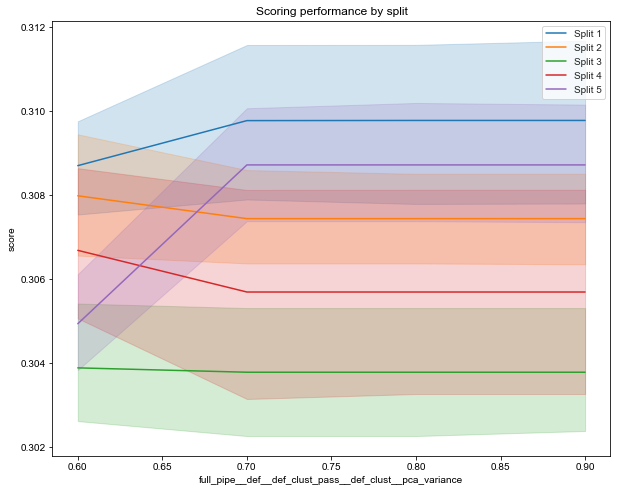

In [12]:
create_result_plot(grid_lr_full2, 'full_pipe__def__def_clust_pass__def_clust__pca_variance')

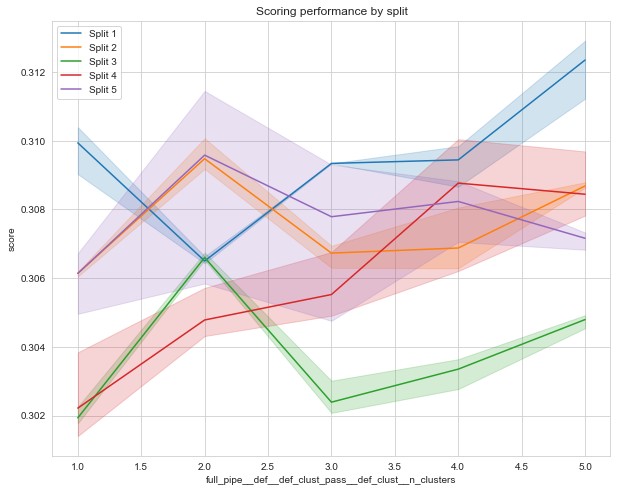

In [13]:
create_result_plot(grid_lr_full2, 'full_pipe__def__def_clust_pass__def_clust__n_clusters')

In [14]:
params_lr3 = {'full_pipe__def__def_clust_pass__def_clust__cols': [['%B', '%M', '%Z']],
              'full_pipe__def__def_clust_pass__pass__select_cols__columns': [[]],
              'full_pipe__def__def_clust_pass__def_clust__n_clusters': range(5, 10),
              'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.6, 0.65, 0.7]}
grid_lr_full3 = GridSearchCV(lr_pipe, params_lr3, cv=5, scoring='f1_macro')
grid_lr_full3.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [15]:
grid_lr_full3.best_score_

0.30912647696601037

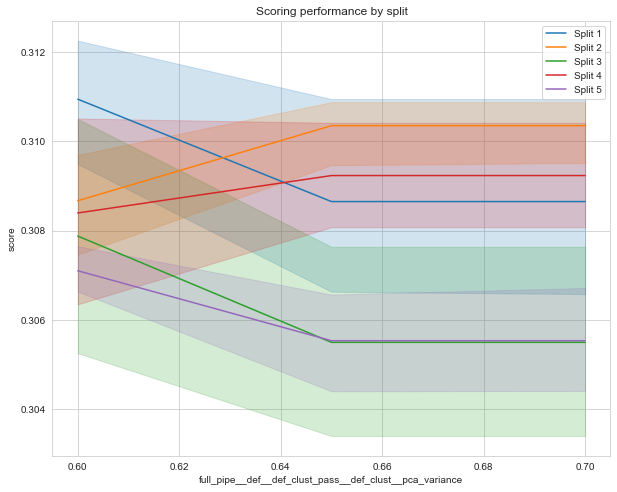

In [16]:
create_result_plot(grid_lr_full3, 'full_pipe__def__def_clust_pass__def_clust__pca_variance')

In [17]:
grid_lr_full3.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['%B', '%M', '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 9,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.6,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': []}

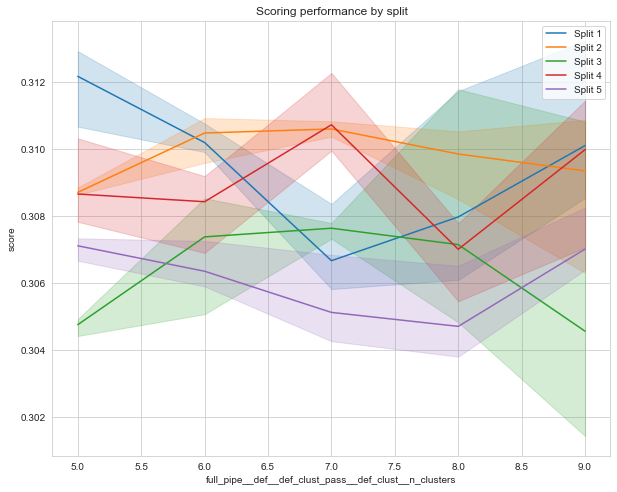

In [18]:
create_result_plot(grid_lr_full3, 'full_pipe__def__def_clust_pass__def_clust__n_clusters')

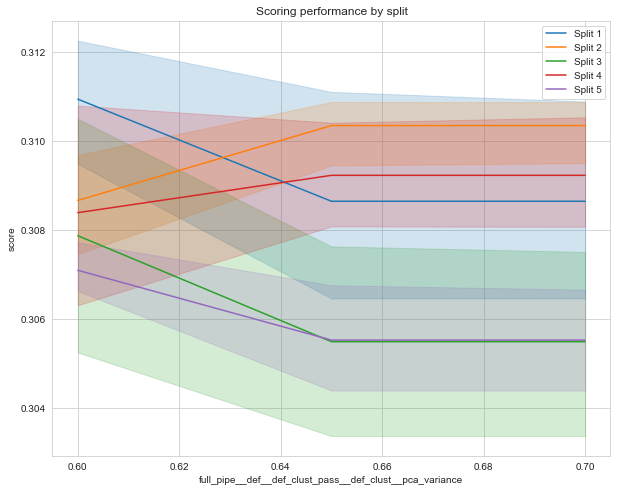

In [19]:
create_result_plot(grid_lr_full3, 'full_pipe__def__def_clust_pass__def_clust__pca_variance')

In [20]:
params_lr4 = {'full_pipe__def__def_clust_pass__def_clust__cols': [['%B', '%M', '%Z']],
              'full_pipe__def__def_clust_pass__pass__select_cols__columns': [[]],
              'full_pipe__def__def_clust_pass__def_clust__n_clusters': range(9, 15),
              'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.5, 0.55, 0.6],
              'full_pipe__off__full_cols__select_cols__columns':
              [list(full_pipe.off_info_cols) + list(full_pipe.off_cat_info_cols) +
               list(full_pipe.off_form_cols),
              list(full_pipe.off_info_cols) + list(full_pipe.off_cat_info_cols) + ['offensiveFormation'],
               list(full_pipe.off_cat_info_cols) + ['offensiveFormation'],
               [col for col in full_pipe.off_cat_info_cols if len(col) != 2] + ['offensiveFormation'],
               list(full_pipe.off_info_cols) + [col for col in full_pipe.off_cat_info_cols if len(col) != 2] + list(full_pipe.off_form_cols)
               ]
              }
grid_lr_full4 = GridSearchCV(lr_pipe, params_lr4, cv=5, scoring='f1_macro')
grid_lr_full4.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [21]:
grid_lr_full4.best_score_

0.31043230336854216

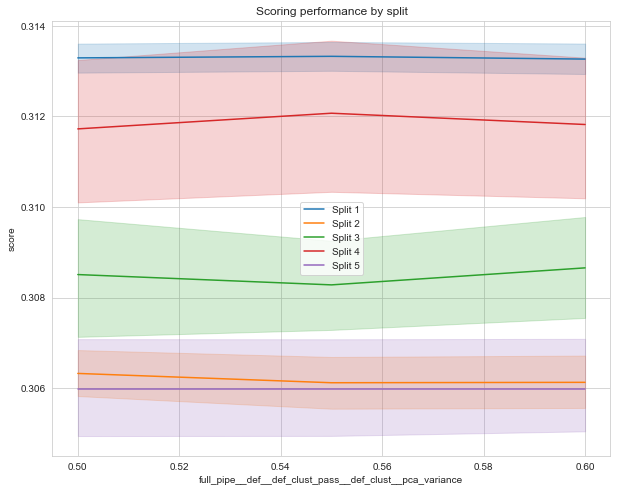

In [22]:
create_result_plot(grid_lr_full4, 'full_pipe__def__def_clust_pass__def_clust__pca_variance')

In [23]:
grid_lr_full4.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['%B', '%M', '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 13,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.5,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': [],
 'full_pipe__off__full_cols__select_cols__columns': ['perc_left',
  'perc_right',
  'perc_behind_los',
  'FB',
  'HB',
  'QB',
  'RB',
  'TE',
  'WR',
  'score_differential',
  'timeRemaining',
  'yardline_first_dir',
  'yardline_100_dir',
  'down',
  'possessionTeam',
  'FBL0_x',
  'FBR0_x',
  'HBL0_x',
  'HBL1_x',
  'HBR0_x',
  'HBR1_x',
  'QB0_x',
  'QB1_x',
  'RBL0_x',
  'RBL1_x',
  'RBL2_x',
  'RBR0_x',
  'RBR1_x',
  'RBR2_x',
  'TEL0_x',
  'TEL1_x',
  'TEL2_x',
  'TER0_x',
  'TER1_x',
  'TER2_x',
  'WRL0_x',
  'WRL1_x',
  'WRL2_x',
  'WRL3_x',
  'WRR0_x',
  'WRR1_x',
  'WRR2_x',
  'WRR3_x',
  'FBL0_y',
  'FBR0_y',
  'HBL0_y',
  'HBL1_y',
  'HBR0_y',
  'HBR1_y',
  'QB0_y',
  'QB1_y',
  'RBL0_y',
  'RBL1_y',
  'RBL2_y',


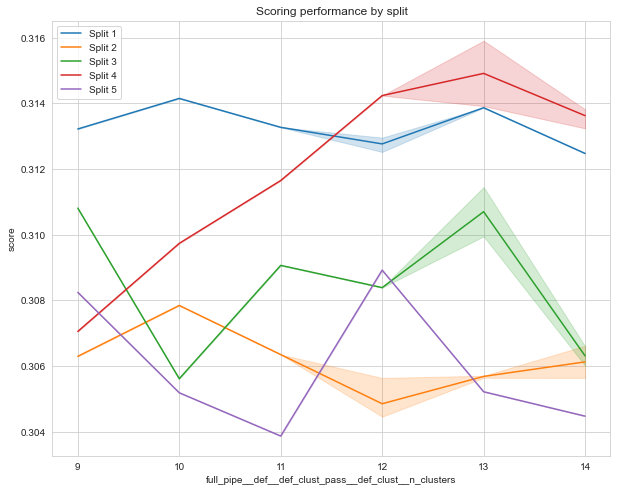

In [24]:
create_result_plot(grid_lr_full4, 'full_pipe__def__def_clust_pass__def_clust__n_clusters')

In [25]:
params5 = {'full_pipe__def__def_clust_pass__def_clust__cols': [['%B', '%M', '%Z']],
           'full_pipe__def__def_clust_pass__pass__select_cols__columns': [[]],
           'full_pipe__def__def_clust_pass__def_clust__n_clusters': [13],
           'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.55],
           'model__C': [10**x for x in range(-3, 4)],
           'model__penalty': ['l2', 'l1'],
           'model__solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
           'model__multi_class': ['auto', 'multinomial']
           }
grid_lr_full5 = GridSearchCV(lr_pipe, params5, cv=5, scoring='f1_macro')
grid_lr_full5.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [26]:
grid_lr_full5.best_score_

0.31352161795522415

In [27]:
grid_lr_full5.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['%B', '%M', '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 13,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.55,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': [],
 'model__C': 100,
 'model__multi_class': 'auto',
 'model__penalty': 'l2',
 'model__solver': 'newton-cg'}

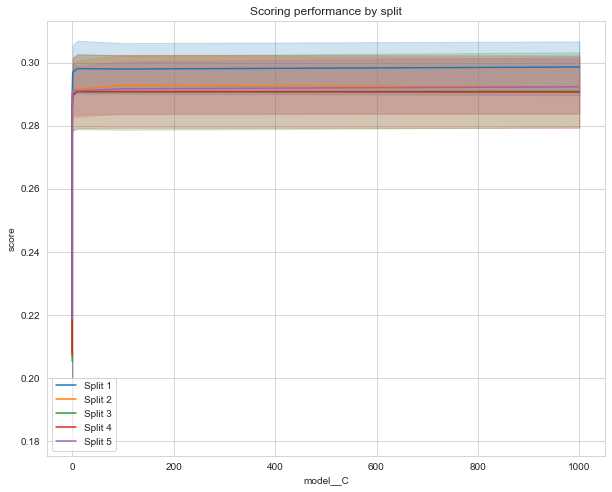

In [28]:
create_result_plot(grid_lr_full5, "model__C")

In [29]:
grid_lr_best = grid_lr_full5

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
y_pred_train_x = grid_lr_best.predict(full_pipe.X_train)
print(classification_report(full_pipe.y_train_x, y_pred_train_x))

              precision    recall  f1-score   support

           1       0.41      0.15      0.23      2660
           2       0.48      0.79      0.60      5515
           3       0.43      0.44      0.44      3721
           4       0.34      0.03      0.06      2016

    accuracy                           0.46     13912
   macro avg       0.42      0.35      0.33     13912
weighted avg       0.44      0.46      0.41     13912



In [32]:
print(confusion_matrix(full_pipe.y_train_x, y_pred_train_x))

[[ 412 1708  506   34]
 [ 270 4332  875   38]
 [ 206 1834 1636   45]
 [ 112 1086  757   61]]


In [33]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(full_pipe.X_train, full_pipe.y_train_x)

DummyClassifier(strategy='most_frequent')

In [34]:
y_pred_x_dummy = dummy.predict(full_pipe.X_train)
print(classification_report(full_pipe.y_train_x, y_pred_x_dummy))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2660
           2       0.40      1.00      0.57      5515
           3       0.00      0.00      0.00      3721
           4       0.00      0.00      0.00      2016

    accuracy                           0.40     13912
   macro avg       0.10      0.25      0.14     13912
weighted avg       0.16      0.40      0.23     13912



In [35]:
grid_lr_best.predict_proba(full_pipe.X_train)

array([[0.42212107, 0.41049991, 0.08998451, 0.07739452],
       [0.1765684 , 0.39838055, 0.26278695, 0.1622641 ],
       [0.31119167, 0.35709953, 0.15872696, 0.17298183],
       ...,
       [0.20177242, 0.53487362, 0.17103808, 0.09231589],
       [0.30461907, 0.47827478, 0.14526491, 0.07184124],
       [0.12949524, 0.44706474, 0.29854558, 0.12489444]])

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfor = RandomForestClassifier(random_state=0)
rfor_pipe = full_pipe.build_pipe(model=rfor)

In [55]:
params = {'full_pipe__def__def_clust_pass__def_clust__cols': best_def_cols}
grid_rfor_full = GridSearchCV(rfor_pipe, params, cv=5, scoring='f1_macro')
grid_rfor_full.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [56]:
grid_rfor_full.best_score_

0.27472532358396795

In [57]:
grid_rfor_full.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['defendersInTheBox',
  'numberOfPassRushers',
  'yardline_first_dir']}

In [58]:
params_rfor2 = {'full_pipe__def__def_clust_pass__def_clust__cols': [['defendersInTheBox',
                                                    'numberOfPassRushers',
                                                    'yardline_first_dir']],
                'full_pipe__def__def_clust_pass__def_clust__n_clusters': range(1, 6),
                'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.8, 0.85, 0.9, 0.95]}
grid_rfor_full2 = GridSearchCV(rfor_pipe, params_rfor2, cv=5, scoring='f1_macro')
grid_rfor_full2.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [59]:
grid_rfor_full2.best_score_

0.27472532358396795

In [60]:
grid_rfor_full2.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['defendersInTheBox',
  'numberOfPassRushers',
  'yardline_first_dir'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 5,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.8}

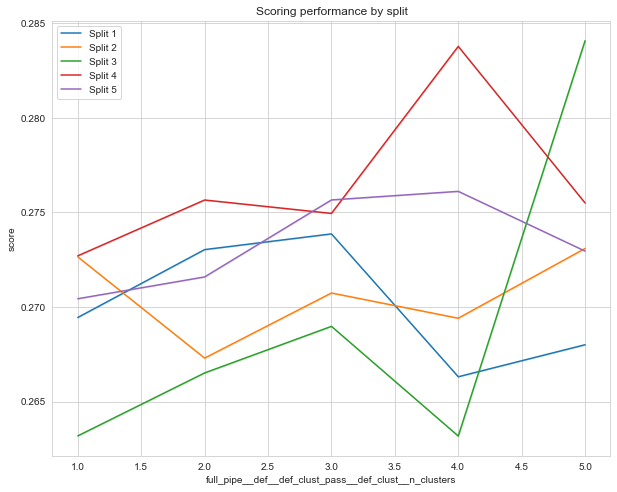

In [61]:
create_result_plot(grid_rfor_full2, "full_pipe__def__def_clust_pass__def_clust__n_clusters")

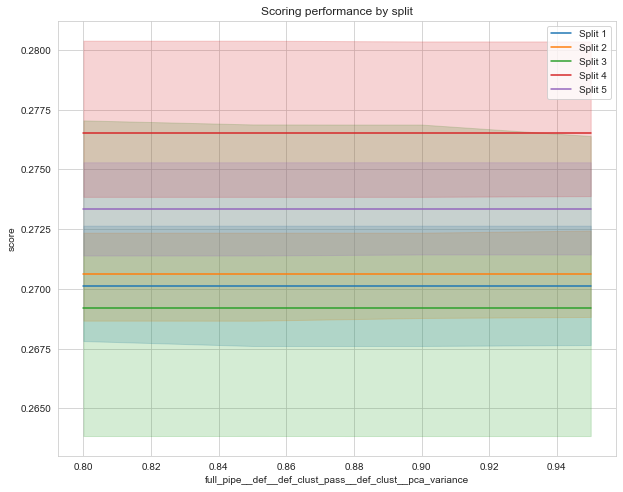

In [62]:
create_result_plot(grid_rfor_full2, "full_pipe__def__def_clust_pass__def_clust__pca_variance")

In [63]:
params_rfor3 = {'full_pipe__def__def_clust_pass__def_clust__cols': [['defendersInTheBox',
                                                     'numberOfPassRushers',
                                                     'yardline_first_dir']],
                'full_pipe__def__def_clust_pass__def_clust__n_clusters': range(5, 10),
                'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.6, 0.7, 0.8, 0.85]}
grid_rfor_full3 = GridSearchCV(rfor_pipe, params_rfor3, cv=5, scoring='f1_macro')
grid_rfor_full3.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [64]:
grid_rfor_full3.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['defendersInTheBox',
  'numberOfPassRushers',
  'yardline_first_dir'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 5,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.8}

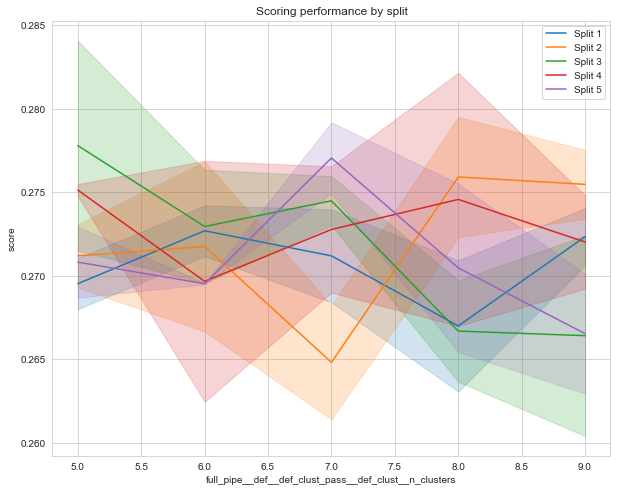

In [65]:
create_result_plot(grid_rfor_full3, 'full_pipe__def__def_clust_pass__def_clust__n_clusters')

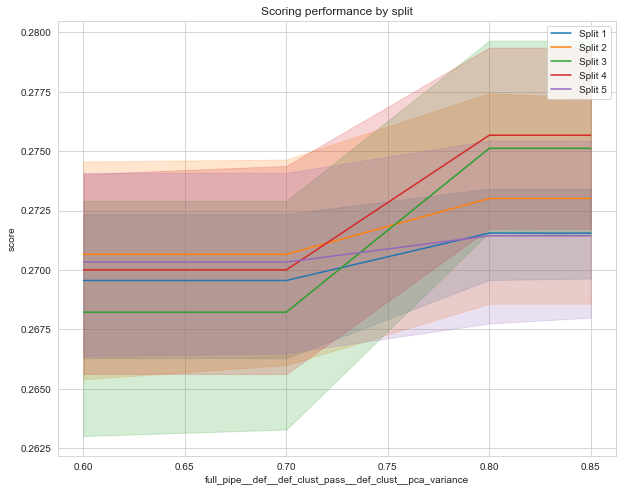

In [66]:
create_result_plot(grid_rfor_full3, 'full_pipe__def__def_clust_pass__def_clust__pca_variance')

In [74]:
grid_rfor_full2.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['defendersInTheBox',
  'numberOfPassRushers',
  'yardline_first_dir'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 5,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.8}

In [76]:
params_rfor_4 = {'full_pipe__def__def_clust_pass__def_clust__cols': [['defendersInTheBox',
                                                     'numberOfPassRushers',
                                                     'yardline_first_dir']],
                 'full_pipe__def__def_clust_pass__def_clust__n_clusters': [5],
                 'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.8],
                 'model__n_estimators': [10 ** x for x in range(1, 5)],
                 'model__max_depth': range(1, 6)}
grid_rfor_full4 = GridSearchCV(rfor_pipe, params_rfor_4, cv=5, scoring='f1_macro')
grid_rfor_full4.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [77]:
grid_rfor_full4.best_score_

0.19768400953146584

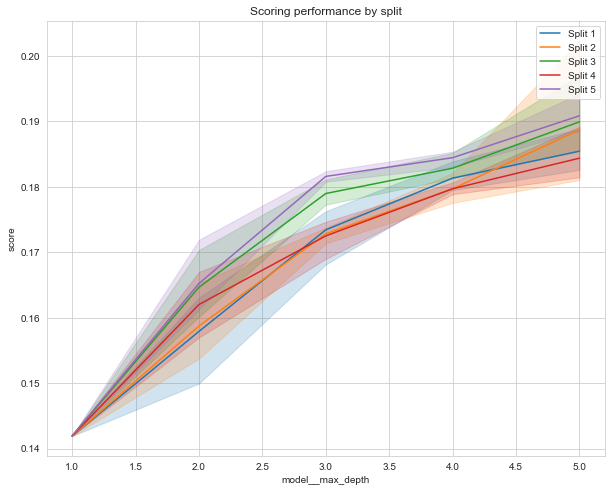

In [78]:
create_result_plot(grid_rfor_full4, "model__max_depth")

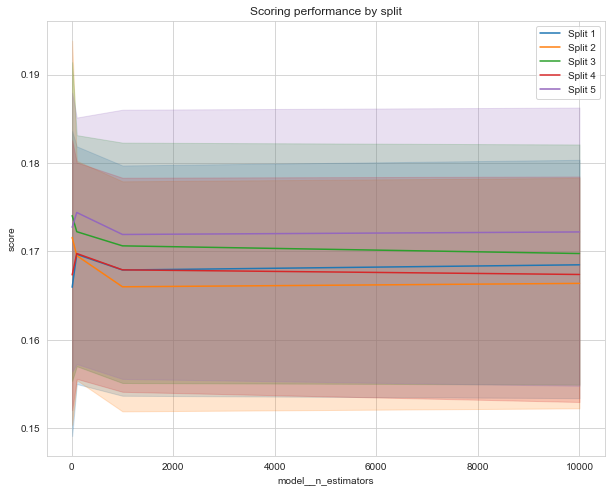

In [79]:
create_result_plot(grid_rfor_full4, "model__n_estimators")

In [80]:
params_rfor_5 = {'full_pipe__def__def_clust_pass__def_clust__cols': [['defendersInTheBox',
                                                      'numberOfPassRushers',
                                                      'yardline_first_dir']],
                 'full_pipe__def__def_clust_pass__def_clust__n_clusters': [3],
                 'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.8],
                 'model__n_estimators': [10],
                 'model__max_depth': range(6, 10)}
grid_rfor_full5 = GridSearchCV(rfor_pipe, params_rfor_5, cv=5, scoring='f1_macro')
grid_rfor_full5.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [81]:
grid_rfor_full5.best_score_

0.2330800724448941

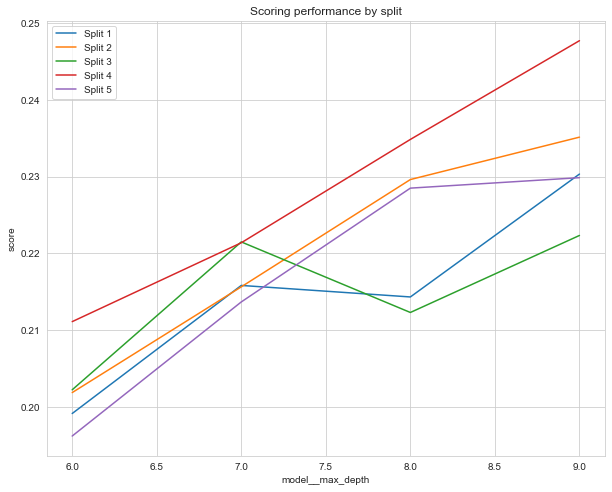

In [82]:
create_result_plot(grid_rfor_full5, "model__max_depth")

In [83]:
params_rfor_6 = {'full_pipe__def__def_clust_pass__def_clust__cols': [['defendersInTheBox',
                                                      'numberOfPassRushers',
                                                      'yardline_first_dir']],
                 'full_pipe__def__def_clust_pass__def_clust__n_clusters': [5],
                 'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.8],
                 'model__n_estimators': [10],
                 'model__max_depth': range(10, 15)}
grid_rfor_full6 = GridSearchCV(rfor_pipe, params_rfor_6, cv=5, scoring='f1_macro')
grid_rfor_full6.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [84]:
grid_rfor_full6.best_score_

0.27253233403314686

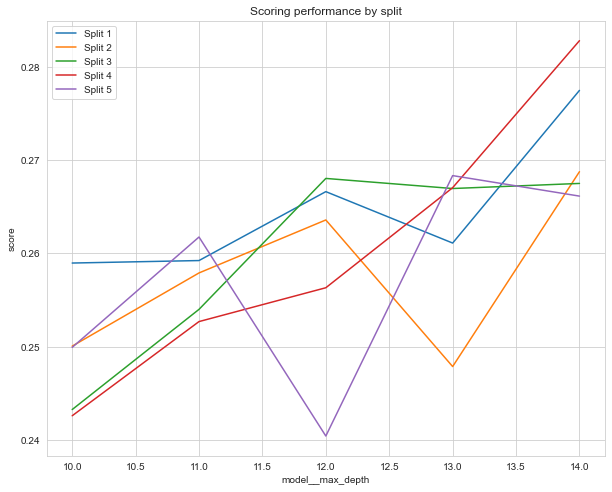

In [85]:
create_result_plot(grid_rfor_full6, "model__max_depth")

In [86]:
grid_rfor_full6.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['defendersInTheBox',
  'numberOfPassRushers',
  'yardline_first_dir'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 5,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.8,
 'model__max_depth': 14,
 'model__n_estimators': 10}

In [87]:
params_rfor_7 = {'full_pipe__def__def_clust_pass__def_clust__cols': [['defendersInTheBox',
                                                      'numberOfPassRushers',
                                                      'yardline_first_dir']],
                 'full_pipe__def__def_clust_pass__def_clust__n_clusters': [5],
                 'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.8],
                 'model__n_estimators': [10],
                 'model__max_depth': range(15, 20)}
grid_rfor_full7 = GridSearchCV(rfor_pipe, params_rfor_7, cv=5, scoring='f1_macro')
grid_rfor_full7.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [88]:
grid_rfor_full7.best_score_

0.27998647774478946

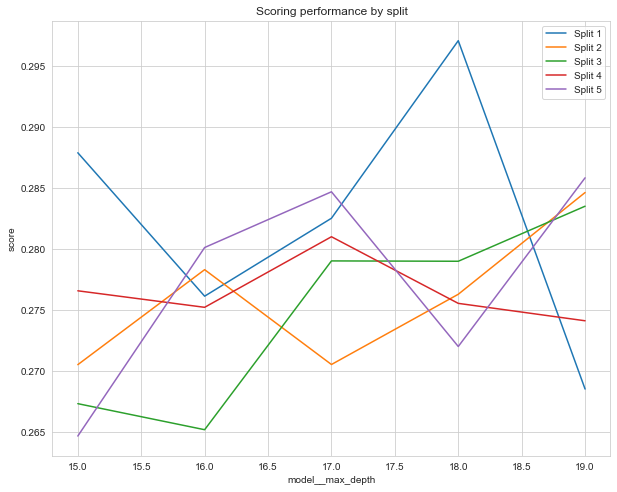

In [89]:
create_result_plot(grid_rfor_full7, "model__max_depth")

In [90]:
grid_lr_best.best_score_

0.31352161795522415

In [91]:
lr_pipe_y = full_pipe.build_pipe(side='both', model=lr_model)

In [94]:
params = {'full_pipe__def__def_clust_pass__def_clust__cols': best_def_cols,
          'full_pipe__def__def_clust_pass__pass__select_cols__columns':
              [full_pipe.def_start_col_x, full_pipe.def_start_col_y, full_pipe.def_start_col, []]


          }
grid_lr_full_y = GridSearchCV(lr_pipe_y, params, cv=5, scoring='f1_macro')
grid_lr_full_y.fit(full_pipe.X_train, full_pipe.y_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [95]:
grid_lr_full_y.best_score_

0.2980065837059543

In [96]:
grid_lr_full_y.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['DB',
  'LB',
  'DL',
  '%B',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': ['CBL0_x_start',
  'CBL1_x_start',
  'CBL2_x_start',
  'CBL3_x_start',
  'CBR0_x_start',
  'CBR1_x_start',
  'CBR2_x_start',
  'CBR3_x_start',
  'DBL0_x_start',
  'DBL1_x_start',
  'DBL2_x_start',
  'DBL3_x_start',
  'DBR0_x_start',
  'DBR1_x_start',
  'DBR2_x_start',
  'DEL0_x_start',
  'DER0_x_start',
  'DLL0_x_start',
  'DLR0_x_start',
  'FSL0_x_start',
  'FSL1_x_start',
  'FSL2_x_start',
  'FSR0_x_start',
  'FSR1_x_start',
  'FSR2_x_start',
  'ILBL0_x_start',
  'ILBL1_x_start',
  'ILBL2_x_start',
  'ILBR0_x_start',
  'ILBR1_x_start',
  'ILBR2_x_start',
  'LBL0_x_start',
  'LBL1_x_start',
  'LBL2_x_start',
  'LBR0_x_start',
  'LBR1_x_start',
  'LBR2_x_start',
  'MLBL0_x_start',
  'MLBL1_x_start',
  'MLBR0_x_start',
  'MLBR1_x_start',
  'NTL0_x_start',
  'OLBL0_x_start',
  'OLBL1_x_start',
  'OLBL2_x_start',
  'OLBL3_x_star

In [101]:
params_lr2_y = {'full_pipe__def__def_clust_pass__def_clust__cols': [['DB',
                                                                  'LB',
                                                                  'DL',
                                                                  '%B',
                                                                  '%M',
                                                                  '%Z']],
                'full_pipe__def__def_clust_pass__pass__select_cols__columns': [full_pipe.def_start_col_x],
              'full_pipe__def__def_clust_pass__def_clust__n_clusters': range(1, 6),
              'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.6, 0.7, 0.8, 0.9]}
grid_lr_full2_y = GridSearchCV(lr_pipe_y, params_lr2_y, cv=5, scoring='f1_macro')
grid_lr_full2_y.fit(full_pipe.X_train, full_pipe.y_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [103]:
grid_lr_full2_y.best_score_

0.2985315955821156

In [104]:
grid_lr_full2_y.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['DB',
  'LB',
  'DL',
  '%B',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 4,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.9,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': ['CBL0_x_start',
  'CBL1_x_start',
  'CBL2_x_start',
  'CBL3_x_start',
  'CBR0_x_start',
  'CBR1_x_start',
  'CBR2_x_start',
  'CBR3_x_start',
  'DBL0_x_start',
  'DBL1_x_start',
  'DBL2_x_start',
  'DBL3_x_start',
  'DBR0_x_start',
  'DBR1_x_start',
  'DBR2_x_start',
  'DEL0_x_start',
  'DER0_x_start',
  'DLL0_x_start',
  'DLR0_x_start',
  'FSL0_x_start',
  'FSL1_x_start',
  'FSL2_x_start',
  'FSR0_x_start',
  'FSR1_x_start',
  'FSR2_x_start',
  'ILBL0_x_start',
  'ILBL1_x_start',
  'ILBL2_x_start',
  'ILBR0_x_start',
  'ILBR1_x_start',
  'ILBR2_x_start',
  'LBL0_x_start',
  'LBL1_x_start',
  'LBL2_x_start',
  'LBR0_x_start',
  'LBR1_x_start',
  'LBR2_x_start',
  'MLBL0_x_start',
  'MLBL1_x_start',
  

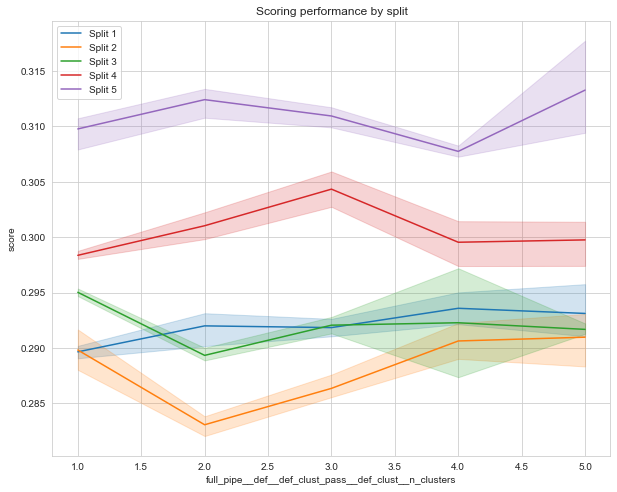

In [105]:
create_result_plot(grid_lr_full2_y, 'full_pipe__def__def_clust_pass__def_clust__n_clusters')

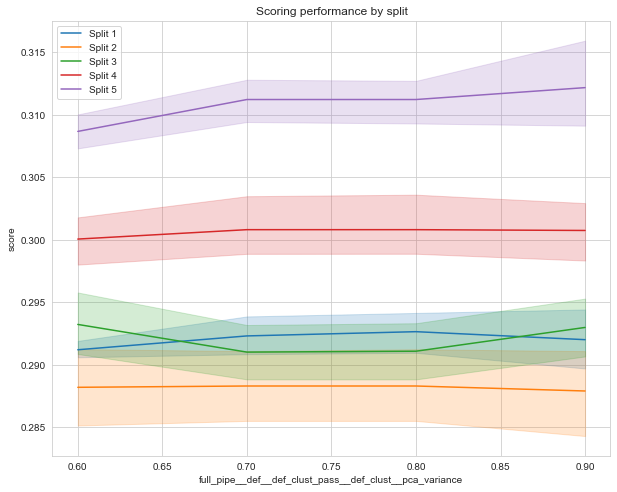

In [106]:
create_result_plot(grid_lr_full2_y, 'full_pipe__def__def_clust_pass__def_clust__pca_variance')

In [107]:
grid_lr_full2_y.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['DB',
  'LB',
  'DL',
  '%B',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 4,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.9,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': ['CBL0_x_start',
  'CBL1_x_start',
  'CBL2_x_start',
  'CBL3_x_start',
  'CBR0_x_start',
  'CBR1_x_start',
  'CBR2_x_start',
  'CBR3_x_start',
  'DBL0_x_start',
  'DBL1_x_start',
  'DBL2_x_start',
  'DBL3_x_start',
  'DBR0_x_start',
  'DBR1_x_start',
  'DBR2_x_start',
  'DEL0_x_start',
  'DER0_x_start',
  'DLL0_x_start',
  'DLR0_x_start',
  'FSL0_x_start',
  'FSL1_x_start',
  'FSL2_x_start',
  'FSR0_x_start',
  'FSR1_x_start',
  'FSR2_x_start',
  'ILBL0_x_start',
  'ILBL1_x_start',
  'ILBL2_x_start',
  'ILBR0_x_start',
  'ILBR1_x_start',
  'ILBR2_x_start',
  'LBL0_x_start',
  'LBL1_x_start',
  'LBL2_x_start',
  'LBR0_x_start',
  'LBR1_x_start',
  'LBR2_x_start',
  'MLBL0_x_start',
  'MLBL1_x_start',
  

In [108]:
params_lr2_y = {'full_pipe__def__def_clust_pass__def_clust__cols': [['DB',
                                                                     'LB',
                                                                     'DL',
                                                                     '%B',
                                                                     '%M',
                                                                     '%Z']],
                'full_pipe__def__def_clust_pass__pass__select_cols__columns': [full_pipe.def_start_col_x],
                'full_pipe__def__def_clust_pass__def_clust__n_clusters': range(5, 10),
                'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.9, 0.95, 0.99]}
grid_lr_full2_y = GridSearchCV(lr_pipe_y, params_lr2_y, cv=5, scoring='f1_macro')
grid_lr_full2_y.fit(full_pipe.X_train, full_pipe.y_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [109]:
grid_lr_full2_y.best_score_

0.2986377292903125

In [110]:
grid_lr_full2_y.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['DB',
  'LB',
  'DL',
  '%B',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 5,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.95,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': ['CBL0_x_start',
  'CBL1_x_start',
  'CBL2_x_start',
  'CBL3_x_start',
  'CBR0_x_start',
  'CBR1_x_start',
  'CBR2_x_start',
  'CBR3_x_start',
  'DBL0_x_start',
  'DBL1_x_start',
  'DBL2_x_start',
  'DBL3_x_start',
  'DBR0_x_start',
  'DBR1_x_start',
  'DBR2_x_start',
  'DEL0_x_start',
  'DER0_x_start',
  'DLL0_x_start',
  'DLR0_x_start',
  'FSL0_x_start',
  'FSL1_x_start',
  'FSL2_x_start',
  'FSR0_x_start',
  'FSR1_x_start',
  'FSR2_x_start',
  'ILBL0_x_start',
  'ILBL1_x_start',
  'ILBL2_x_start',
  'ILBR0_x_start',
  'ILBR1_x_start',
  'ILBR2_x_start',
  'LBL0_x_start',
  'LBL1_x_start',
  'LBL2_x_start',
  'LBR0_x_start',
  'LBR1_x_start',
  'LBR2_x_start',
  'MLBL0_x_start',
  'MLBL1_x_start',
 

In [111]:
params_lr3_y = {'full_pipe__def__def_clust_pass__def_clust__cols': [['DB',
                                                                     'LB',
                                                                     'DL',
                                                                     '%B',
                                                                     '%M',
                                                                     '%Z']],
              'full_pipe__def__def_clust_pass__pass__select_cols__columns': [full_pipe.def_start_col_x],
              'full_pipe__def__def_clust_pass__def_clust__n_clusters': [5],
              'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.95],
              'full_pipe__off__full_cols__select_cols__columns':
                  [list(full_pipe.off_info_cols) + list(full_pipe.off_cat_info_cols) +
                   list(full_pipe.off_form_cols),
                   list(full_pipe.off_info_cols) + list(full_pipe.off_cat_info_cols) + ['offensiveFormation'],
                   list(full_pipe.off_cat_info_cols) + ['offensiveFormation'],
                   [col for col in full_pipe.off_cat_info_cols if len(col) != 2] + ['offensiveFormation'],
                   list(full_pipe.off_info_cols) + [col for col in full_pipe.off_cat_info_cols if len(col) != 2] + list(full_pipe.off_form_cols)
                   ]
              }
grid_lr_full3_y = GridSearchCV(lr_pipe_y, params_lr3_y, cv=5, scoring='f1_macro')
grid_lr_full3_y.fit(full_pipe.X_train, full_pipe.y_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [112]:
grid_lr_full3_y.best_score_

0.29880998630585376

In [113]:
grid_lr_full3_y.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['DB',
  'LB',
  'DL',
  '%B',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 5,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.95,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': ['CBL0_x_start',
  'CBL1_x_start',
  'CBL2_x_start',
  'CBL3_x_start',
  'CBR0_x_start',
  'CBR1_x_start',
  'CBR2_x_start',
  'CBR3_x_start',
  'DBL0_x_start',
  'DBL1_x_start',
  'DBL2_x_start',
  'DBL3_x_start',
  'DBR0_x_start',
  'DBR1_x_start',
  'DBR2_x_start',
  'DEL0_x_start',
  'DER0_x_start',
  'DLL0_x_start',
  'DLR0_x_start',
  'FSL0_x_start',
  'FSL1_x_start',
  'FSL2_x_start',
  'FSR0_x_start',
  'FSR1_x_start',
  'FSR2_x_start',
  'ILBL0_x_start',
  'ILBL1_x_start',
  'ILBL2_x_start',
  'ILBR0_x_start',
  'ILBR1_x_start',
  'ILBR2_x_start',
  'LBL0_x_start',
  'LBL1_x_start',
  'LBL2_x_start',
  'LBR0_x_start',
  'LBR1_x_start',
  'LBR2_x_start',
  'MLBL0_x_start',
  'MLBL1_x_start',
 

In [114]:
params_lr4_y = {'full_pipe__def__def_clust_pass__def_clust__cols': [['DB',
                                                                     'LB',
                                                                     'DL',
                                                                     '%B',
                                                                     '%M',
                                                                     '%Z']],
                'full_pipe__def__def_clust_pass__pass__select_cols__columns': [full_pipe.def_start_col_x],
                'full_pipe__def__def_clust_pass__def_clust__n_clusters': [5],
                'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.95],
           'model__C': [10**x for x in range(-3, 4)],
           'model__penalty': ['l2', 'l1'],
           'model__solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
           'model__multi_class': ['auto', 'multinomial']
           }
grid_lr_full5_y = GridSearchCV(lr_pipe_y, params_lr4_y, cv=5, scoring='f1_macro')
grid_lr_full5_y.fit(full_pipe.X_train, full_pipe.y_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [115]:
grid_lr_full5_y.best_score_

0.29991434240705334

In [116]:
grid_lr_full5_y.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['DB',
  'LB',
  'DL',
  '%B',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 5,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.95,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': ['CBL0_x_start',
  'CBL1_x_start',
  'CBL2_x_start',
  'CBL3_x_start',
  'CBR0_x_start',
  'CBR1_x_start',
  'CBR2_x_start',
  'CBR3_x_start',
  'DBL0_x_start',
  'DBL1_x_start',
  'DBL2_x_start',
  'DBL3_x_start',
  'DBR0_x_start',
  'DBR1_x_start',
  'DBR2_x_start',
  'DEL0_x_start',
  'DER0_x_start',
  'DLL0_x_start',
  'DLR0_x_start',
  'FSL0_x_start',
  'FSL1_x_start',
  'FSL2_x_start',
  'FSR0_x_start',
  'FSR1_x_start',
  'FSR2_x_start',
  'ILBL0_x_start',
  'ILBL1_x_start',
  'ILBL2_x_start',
  'ILBR0_x_start',
  'ILBR1_x_start',
  'ILBR2_x_start',
  'LBL0_x_start',
  'LBL1_x_start',
  'LBL2_x_start',
  'LBR0_x_start',
  'LBR1_x_start',
  'LBR2_x_start',
  'MLBL0_x_start',
  'MLBL1_x_start',
 

In [117]:
rfor = RandomForestClassifier(random_state=0)

rfor_pipe_y = full_pipe.build_pipe(model = rfor)

In [118]:
grid_rfor_full_y = GridSearchCV(rfor_pipe_y, params, cv=5, scoring='f1_macro')
grid_rfor_full_y.fit(full_pipe.X_train, full_pipe.y_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [119]:
grid_rfor_full_y.best_score_

0.2958734770612625

In [120]:
grid_rfor_full_y.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['defendersInTheBox',
  'numberOfPassRushers',
  'yardline_first_dir',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': ['CBL0_y_start',
  'CBL1_y_start',
  'CBL2_y_start',
  'CBL3_y_start',
  'CBR0_y_start',
  'CBR1_y_start',
  'CBR2_y_start',
  'CBR3_y_start',
  'DBL0_y_start',
  'DBL1_y_start',
  'DBL2_y_start',
  'DBL3_y_start',
  'DBR0_y_start',
  'DBR1_y_start',
  'DBR2_y_start',
  'DEL0_y_start',
  'DER0_y_start',
  'DLL0_y_start',
  'DLR0_y_start',
  'FSL0_y_start',
  'FSL1_y_start',
  'FSL2_y_start',
  'FSR0_y_start',
  'FSR1_y_start',
  'FSR2_y_start',
  'ILBL0_y_start',
  'ILBL1_y_start',
  'ILBL2_y_start',
  'ILBR0_y_start',
  'ILBR1_y_start',
  'ILBR2_y_start',
  'LBL0_y_start',
  'LBL1_y_start',
  'LBL2_y_start',
  'LBR0_y_start',
  'LBR1_y_start',
  'LBR2_y_start',
  'MLBL0_y_start',
  'MLBL1_y_start',
  'MLBR0_y_start',
  'MLBR1_y_start',
  'NTL0_y_start',
  'OLBL0_y_start',
  'OLBL1_y_st

In [126]:
params_rfor2_y = {'full_pipe__def__def_clust_pass__def_clust__cols': [['defendersInTheBox',
                                                                     'numberOfPassRushers',
                                                                     'yardline_first_dir',
                                                                     '%M',
                                                                     '%Z']],
                'full_pipe__def__def_clust_pass__pass__select_cols__columns': [full_pipe.def_start_col_y],
                'full_pipe__def__def_clust_pass__def_clust__n_clusters': range(1, 6),
                'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.6, 0.7, 0.8, 0.9]}
grid_rfor_full2_y = GridSearchCV(rfor_pipe_y, params_rfor2_y, cv=5, scoring='f1_macro')
grid_rfor_full2_y.fit(full_pipe.X_train, full_pipe.y_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [127]:
grid_rfor_full2_y.best_score_

0.2990385668482186

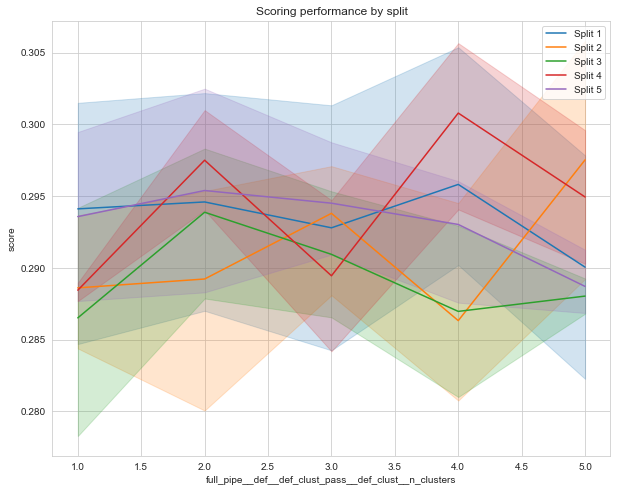

In [128]:
create_result_plot(grid_rfor_full2_y, 'full_pipe__def__def_clust_pass__def_clust__n_clusters')

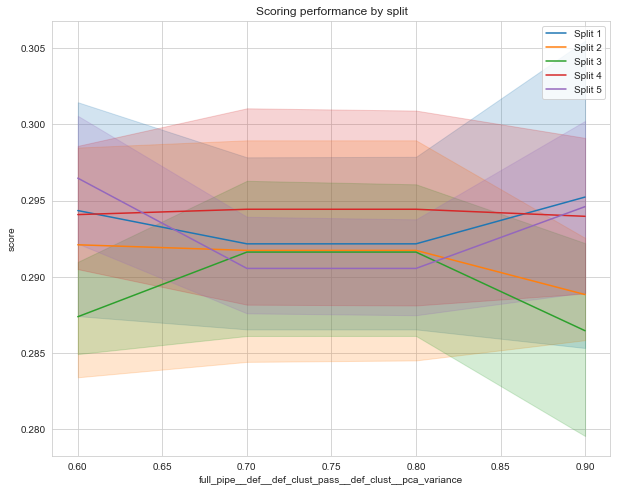

In [129]:
create_result_plot(grid_rfor_full2_y, 'full_pipe__def__def_clust_pass__def_clust__pca_variance')

In [130]:
grid_rfor_full2_y.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['defendersInTheBox',
  'numberOfPassRushers',
  'yardline_first_dir',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 2,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.9,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': ['CBL0_y_start',
  'CBL1_y_start',
  'CBL2_y_start',
  'CBL3_y_start',
  'CBR0_y_start',
  'CBR1_y_start',
  'CBR2_y_start',
  'CBR3_y_start',
  'DBL0_y_start',
  'DBL1_y_start',
  'DBL2_y_start',
  'DBL3_y_start',
  'DBR0_y_start',
  'DBR1_y_start',
  'DBR2_y_start',
  'DEL0_y_start',
  'DER0_y_start',
  'DLL0_y_start',
  'DLR0_y_start',
  'FSL0_y_start',
  'FSL1_y_start',
  'FSL2_y_start',
  'FSR0_y_start',
  'FSR1_y_start',
  'FSR2_y_start',
  'ILBL0_y_start',
  'ILBL1_y_start',
  'ILBL2_y_start',
  'ILBR0_y_start',
  'ILBR1_y_start',
  'ILBR2_y_start',
  'LBL0_y_start',
  'LBL1_y_start',
  'LBL2_y_start',
  'LBR0_y_start',
  'LBR1_y_start',
  'LBR2_y_start',


In [133]:
params_rfor3_y = {'full_pipe__def__def_clust_pass__def_clust__cols': [['defendersInTheBox',
                                                                     'numberOfPassRushers',
                                                                     'yardline_first_dir',
                                                                     '%M',
                                                                     '%Z']],
                'full_pipe__def__def_clust_pass__pass__select_cols__columns': [full_pipe.def_start_col_y],
                'full_pipe__def__def_clust_pass__def_clust__n_clusters': [2],
                'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.9],
                  'model__n_estimators': [10**x for x in range(1, 5)],
                  'model__max_depth': range(1, 6)
                }
grid_rfor_full3_y = GridSearchCV(rfor_pipe_y, params_rfor3_y, cv=5, scoring='f1_macro')
grid_rfor_full3_y.fit(full_pipe.X_train, full_pipe.y_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [134]:
grid_rfor_full3_y.best_score_

0.2428905915077258

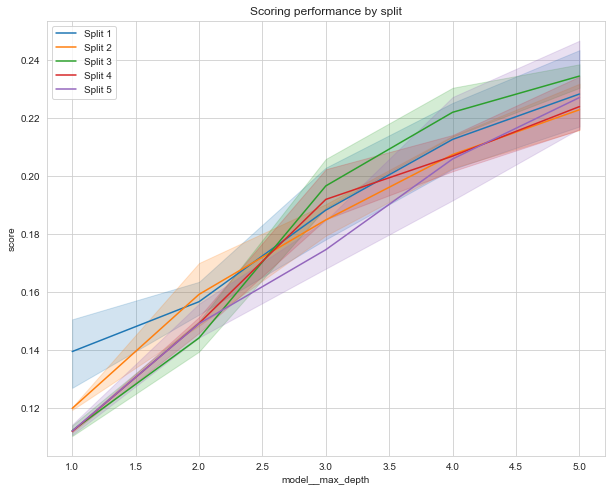

In [135]:
create_result_plot(grid_rfor_full3_y, "model__max_depth")

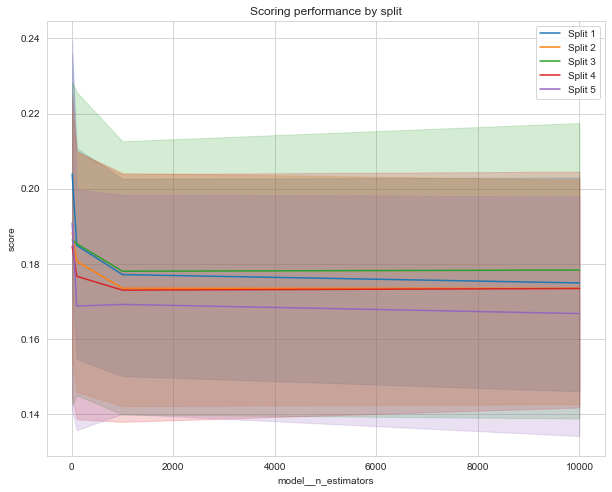

In [136]:
create_result_plot(grid_rfor_full3_y, "model__n_estimators")

In [137]:
grid_rfor_full3_y.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['defendersInTheBox',
  'numberOfPassRushers',
  'yardline_first_dir',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 2,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.9,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': ['CBL0_y_start',
  'CBL1_y_start',
  'CBL2_y_start',
  'CBL3_y_start',
  'CBR0_y_start',
  'CBR1_y_start',
  'CBR2_y_start',
  'CBR3_y_start',
  'DBL0_y_start',
  'DBL1_y_start',
  'DBL2_y_start',
  'DBL3_y_start',
  'DBR0_y_start',
  'DBR1_y_start',
  'DBR2_y_start',
  'DEL0_y_start',
  'DER0_y_start',
  'DLL0_y_start',
  'DLR0_y_start',
  'FSL0_y_start',
  'FSL1_y_start',
  'FSL2_y_start',
  'FSR0_y_start',
  'FSR1_y_start',
  'FSR2_y_start',
  'ILBL0_y_start',
  'ILBL1_y_start',
  'ILBL2_y_start',
  'ILBR0_y_start',
  'ILBR1_y_start',
  'ILBR2_y_start',
  'LBL0_y_start',
  'LBL1_y_start',
  'LBL2_y_start',
  'LBR0_y_start',
  'LBR1_y_start',
  'LBR2_y_start',


In [138]:
params_rfor4_y = {'full_pipe__def__def_clust_pass__def_clust__cols': [['defendersInTheBox',
                                                                       'numberOfPassRushers',
                                                                       'yardline_first_dir',
                                                                       '%M',
                                                                       '%Z']],
                  'full_pipe__def__def_clust_pass__pass__select_cols__columns': [full_pipe.def_start_col_y],
                  'full_pipe__def__def_clust_pass__def_clust__n_clusters': [2],
                  'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.9],
                  'model__n_estimators': [10],
                  'model__max_depth': range(5, 10)
                  }
grid_rfor_full4_y = GridSearchCV(rfor_pipe_y, params_rfor4_y, cv=5, scoring='f1_macro')
grid_rfor_full4_y.fit(full_pipe.X_train, full_pipe.y_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [139]:
grid_rfor_full4_y.best_score_

0.27205274274654867

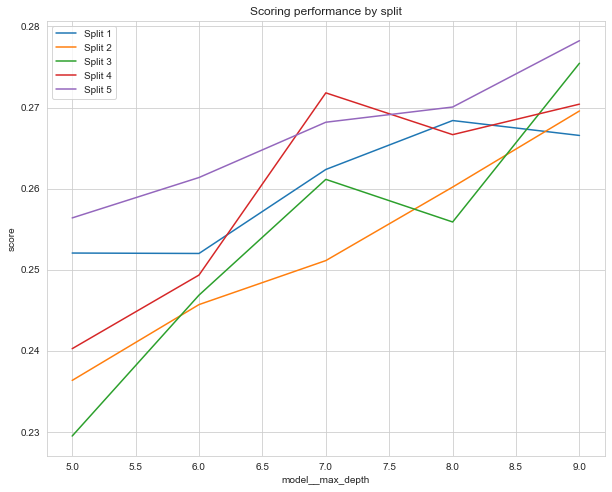

In [140]:
create_result_plot(grid_rfor_full4_y, "model__max_depth")

In [141]:
params_rfor5_y = {'full_pipe__def__def_clust_pass__def_clust__cols': [['defendersInTheBox',
                                                                       'numberOfPassRushers',
                                                                       'yardline_first_dir',
                                                                       '%M',
                                                                       '%Z']],
                  'full_pipe__def__def_clust_pass__pass__select_cols__columns': [full_pipe.def_start_col_y],
                  'full_pipe__def__def_clust_pass__def_clust__n_clusters': [2],
                  'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.9],
                  'model__n_estimators': [10],
                  'model__max_depth': range(10, 15)
                  }
grid_rfor_full5_y = GridSearchCV(rfor_pipe_y, params_rfor5_y, cv=5, scoring='f1_macro')
grid_rfor_full5_y.fit(full_pipe.X_train, full_pipe.y_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [142]:
grid_rfor_full5_y.best_score_

0.2804081691982509

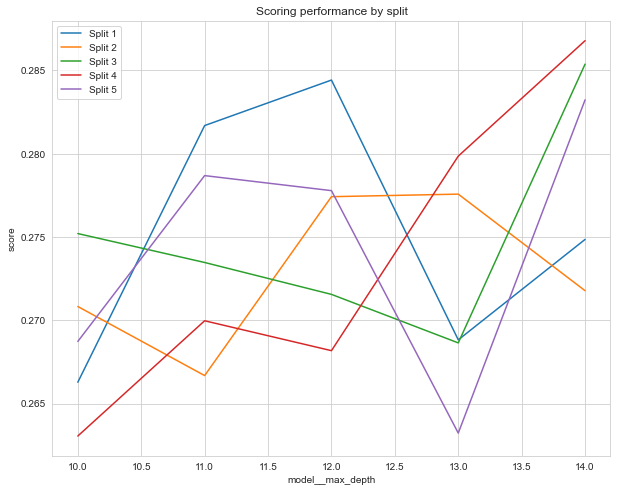

In [143]:
create_result_plot(grid_rfor_full5_y, "model__max_depth")

In [144]:
params_rfor6_y = {'full_pipe__def__def_clust_pass__def_clust__cols': [['defendersInTheBox',
                                                                       'numberOfPassRushers',
                                                                       'yardline_first_dir',
                                                                       '%M',
                                                                       '%Z']],
                  'full_pipe__def__def_clust_pass__pass__select_cols__columns': [full_pipe.def_start_col_y],
                  'full_pipe__def__def_clust_pass__def_clust__n_clusters': [2],
                  'full_pipe__def__def_clust_pass__def_clust__pca_variance': [0.9],
                  'model__n_estimators': [10],
                  'model__max_depth': range(15, 20)
                  }
grid_rfor_full6_y = GridSearchCV(rfor_pipe_y, params_rfor6_y, cv=5, scoring='f1_macro')
grid_rfor_full6_y.fit(full_pipe.X_train, full_pipe.y_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_firs...
                  

In [146]:
grid_rfor_full6_y.best_score_

0.2798429787249146

In [149]:
best_model_y = grid_lr_full5_y

In [153]:
y_pred_train_y = best_model_y.predict(full_pipe.X_train)

print(classification_report(full_pipe.y_train_y, y_pred_train_y))

              precision    recall  f1-score   support

           0       0.36      0.33      0.34      3323
           1       0.35      0.46      0.40      3949
           2       0.35      0.39      0.37      3688
           3       0.35      0.20      0.25      2952

    accuracy                           0.35     13912
   macro avg       0.35      0.34      0.34     13912
weighted avg       0.35      0.35      0.35     13912



In [155]:
dummy_y = DummyClassifier(strategy="most_frequent")
dummy_y.fit(full_pipe.X_train, full_pipe.y_train_y)
y_pred_dummy_y = dummy_y.predict(full_pipe.X_train)

In [156]:
print(classification_report(full_pipe.y_train_y, y_pred_dummy_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3323
           1       0.28      1.00      0.44      3949
           2       0.00      0.00      0.00      3688
           3       0.00      0.00      0.00      2952

    accuracy                           0.28     13912
   macro avg       0.07      0.25      0.11     13912
weighted avg       0.08      0.28      0.13     13912



In [160]:
!pip install dill

     |████████████████████████████████| 86 kB 1.5 MB/s eta 0:00:01


In [167]:
import dill as pickle

with open('models/model_full_x.pkl', 'wb') as model_x:
    pickle.dump(grid_lr_best, model_x, pickle.HIGHEST_PROTOCOL)

with open("models/model_full_y.pkl", "wb") as model_y:
    pickle.dump(best_model_y, model_y, pickle.HIGHEST_PROTOCOL)

In [163]:
with open('models/model_full_x', 'rb') as model_x:
    model_x_best = pickle.load(model_x)

In [166]:
model_x_best.predict_proba(full_pipe.X_test)

array([[0.10676052, 0.43548512, 0.27695652, 0.18079784],
       [0.30861723, 0.3885022 , 0.19306257, 0.109818  ],
       [0.40263523, 0.35564689, 0.16003543, 0.08168245],
       ...,
       [0.27079151, 0.33388764, 0.2245283 , 0.17079256],
       [0.12434532, 0.3379811 , 0.34747905, 0.19019453],
       [0.21849397, 0.48001376, 0.17426036, 0.12723192]])

In [168]:
model_x_best.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['%B', '%M', '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 13,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.55,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': [],
 'model__C': 100,
 'model__multi_class': 'auto',
 'model__penalty': 'l2',
 'model__solver': 'newton-cg'}

In [170]:
best_model_y.best_params_

{'full_pipe__def__def_clust_pass__def_clust__cols': ['DB',
  'LB',
  'DL',
  '%B',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust_pass__def_clust__n_clusters': 5,
 'full_pipe__def__def_clust_pass__def_clust__pca_variance': 0.95,
 'full_pipe__def__def_clust_pass__pass__select_cols__columns': ['CBL0_x_start',
  'CBL1_x_start',
  'CBL2_x_start',
  'CBL3_x_start',
  'CBR0_x_start',
  'CBR1_x_start',
  'CBR2_x_start',
  'CBR3_x_start',
  'DBL0_x_start',
  'DBL1_x_start',
  'DBL2_x_start',
  'DBL3_x_start',
  'DBR0_x_start',
  'DBR1_x_start',
  'DBR2_x_start',
  'DEL0_x_start',
  'DER0_x_start',
  'DLL0_x_start',
  'DLR0_x_start',
  'FSL0_x_start',
  'FSL1_x_start',
  'FSL2_x_start',
  'FSR0_x_start',
  'FSR1_x_start',
  'FSR2_x_start',
  'ILBL0_x_start',
  'ILBL1_x_start',
  'ILBL2_x_start',
  'ILBR0_x_start',
  'ILBR1_x_start',
  'ILBR2_x_start',
  'LBL0_x_start',
  'LBL1_x_start',
  'LBL2_x_start',
  'LBR0_x_start',
  'LBR1_x_start',
  'LBR2_x_start',
  'MLBL0_x_start',
  'MLBL1_x_start',
 